<a href="https://colab.research.google.com/github/BrandyTee/My-ML-Projects/blob/main/Supervised%20Learning/Fake_News_Prediction_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/datasets/fake_news.csv"

df = pd.read_csv(path)
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
#Get information on our Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
#Turn our label categories to Numerical values
df.replace({
"label":{"FAKE":0, "REAL":1},
},
inplace=True
)

/tmp/ipython-input-3939659481.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({


In [ ]:
#Separate our Data
X = df["text"]
Y = df["label"]

In [ ]:
Y.head()

,label
0,0
1,0
2,1
3,0
4,1


In [ ]:
#Turn our X into numbers
vectorizer = TfidfVectorizer(stop_words="english", max_features=8000, ngram_range=(1,1), lowercase=True)

vectorizer

TfidfVectorizer(max_features=8000, stop_words='english')

In [ ]:
#Input our X to our vectorizer
X = vectorizer.fit_transform(X)

In [ ]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1399193 stored elements and shape (6335, 8000)>
  Coords	Values
  (0, 1915)	0.03215703294921082
  (0, 4023)	0.029659889016455804
  (0, 2904)	0.02265421430481235
  (0, 3096)	0.021109580519719565
  (0, 1233)	0.01811214326509623
  (0, 4872)	0.029704737120220127
  (0, 7983)	0.032225560514697014
  (0, 7953)	0.027131738071834572
  (0, 3009)	0.02779260810642662
  (0, 5814)	0.025059020780453394
  (0, 3940)	0.02685640720693797
  (0, 2943)	0.04099018053781304
  (0, 6928)	0.06185042445249966
  (0, 2462)	0.0528378363624957
  (0, 3492)	0.2221387324226309
  (0, 6254)	0.031350378197007166
  (0, 1411)	0.19036488233383791
  (0, 3244)	0.0883953026903095
  (0, 7770)	0.07713002242566676
  (0, 2874)	0.6195390427566334
  (0, 7920)	0.021780808186538218
  (0, 7573)	0.10227408143376722
  (0, 7287)	0.029804300765793632
  (0, 5094)	0.029114471849016204
  (0, 6171)	0.026451599716834962
  :	:
  (6334, 5288)	0.043834544392328666
  (6334, 1095)	0.03745554

In [ ]:
#Train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.2, random_state=2
)

In [ ]:
#Create Model Function
def model_function(model):
    model.fit(X_train, y_train)

    #Prediction
    pred = model.predict(X_test)
    train_pred = model.predict(X_train)

    train_accuracy = accuracy_score(y_train, train_pred)
    accuracy = accuracy_score(y_test, pred)
    matrix = confusion_matrix(y_test, pred)

    print("Train Accuracy: ", train_accuracy)
    print("Accuracy: ", accuracy)
    sns.heatmap(matrix, annot=True, cmap="Blues")

Train Accuracy:  1.0
Accuracy:  0.8958168902920284


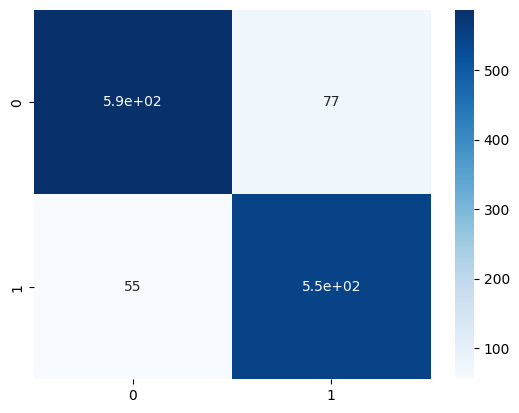

In [ ]:
trees = ExtraTreesClassifier()
model_function(trees)

Train Accuracy:  1.0
Accuracy:  0.8208366219415943


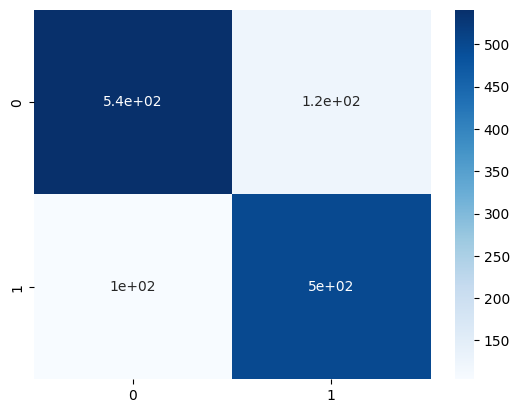

In [ ]:
tree = DecisionTreeClassifier()#max_depth=15)
model_function(tree)

Train Accuracy:  1.0
Accuracy:  0.823993685872139


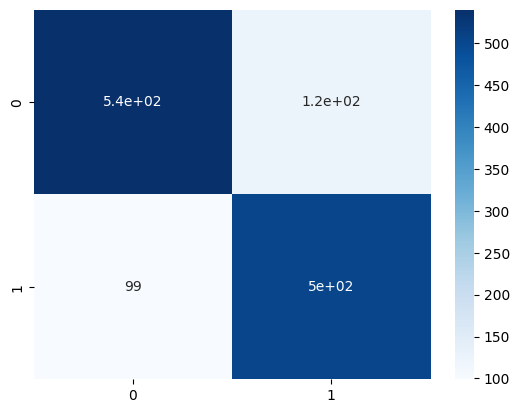

In [ ]:
boost = AdaBoostClassifier(
tree, learning_rate=0.1, n_estimators=150
)
model_function(boost)

In [ ]:
#Save our ExtraTreesClassifier
joblib.dump(trees, "fake_news_chatgpt.joblib")

['fake_news_chatgpt.joblib']